1: Exploratory Data Analysis (EDA):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv("/content/sample_data/wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
data.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [8]:
data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [9]:
data.duplicated().sum()

0

<Axes: >

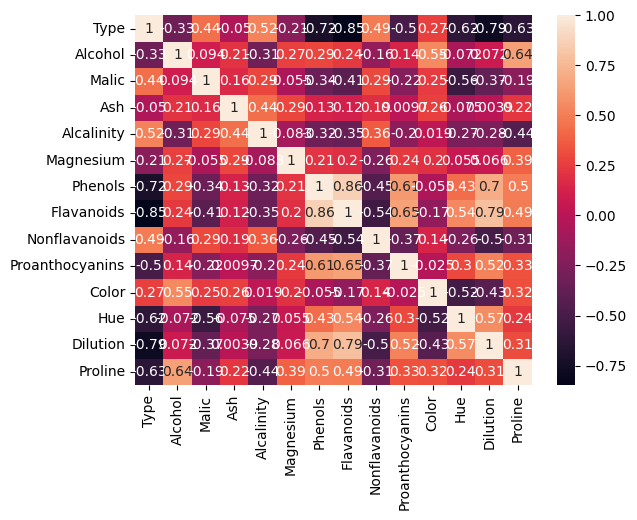

In [10]:
sns.heatmap(data.corr(),annot=True)

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

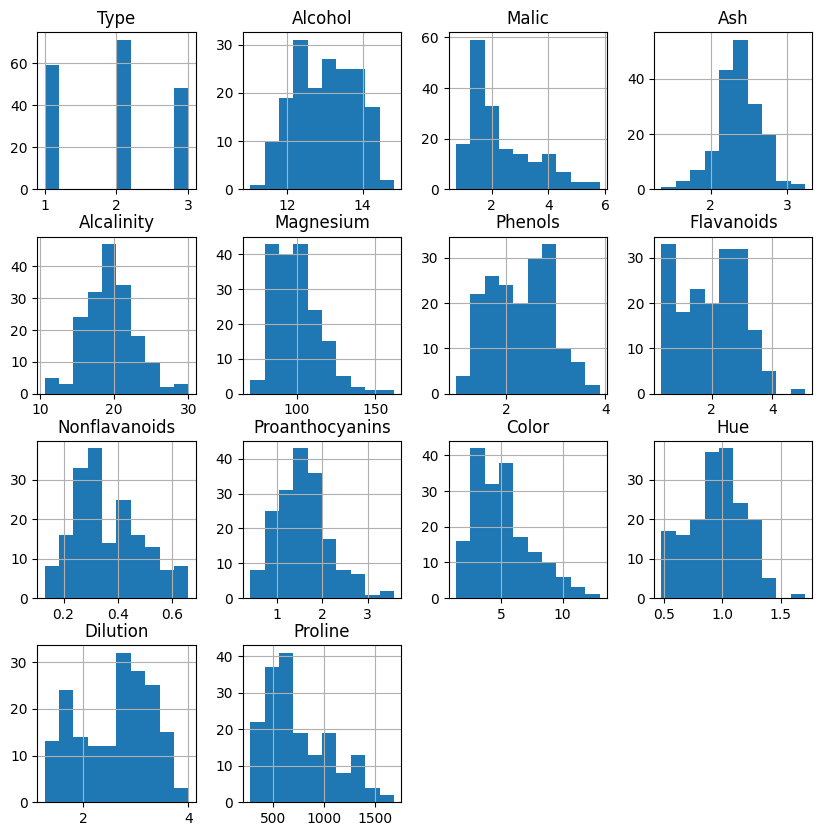

In [11]:
data.hist(figsize=(10,10))

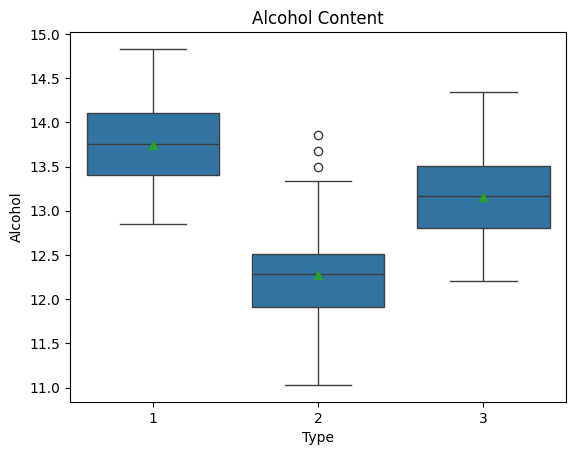

In [12]:
sns.boxplot(data=data,x='Type',y='Alcohol',showmeans=True)
plt.title("Alcohol Content")
plt.show()

2: Dimensionality Reduction with PCA

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [14]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
DATA=data.values
DATA

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [16]:
data_normalised=scale(DATA)
data_normalised

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [18]:
pca=PCA()
pca_values=pca.fit_transform(data_normalised)
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [19]:
PCA_components=pd.DataFrame(pca_values)
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823


In [25]:
var=pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 ])

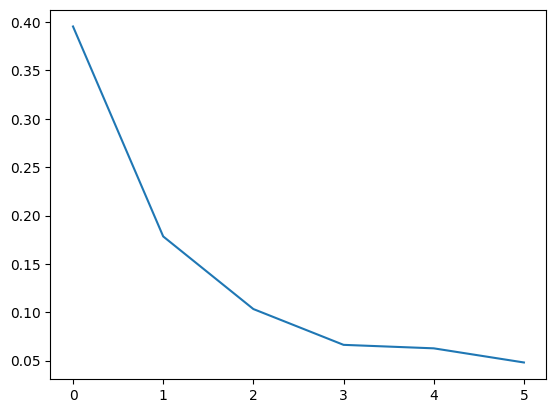

In [26]:
plt.plot(var)

In [27]:
pca=PCA(n_components=6)
pca_values=pca.fit_transform(data_normalised)
pca_values

array([[-3.5229339 , -1.45309844, -0.16479549, -0.01327282,  0.73734536,
        -0.30071618],
       [-2.52885806,  0.33001925, -2.02670665, -0.41714436, -0.28321373,
        -0.88430941],
       [-2.78502898, -1.03693595,  0.9832377 ,  0.66423241, -0.38756497,
         0.46884161],
       ...,
       [ 3.02727243, -2.75604024, -0.94080304,  0.60775846,  1.12813634,
         0.00529036],
       [ 2.75522166, -2.29378408, -0.55047368, -0.39157042,  1.06708304,
         1.01256231],
       [ 3.49633565, -2.76060799,  1.01315115,  0.3496303 , -1.00513627,
         0.37722337]])

In [28]:
var=pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 ])

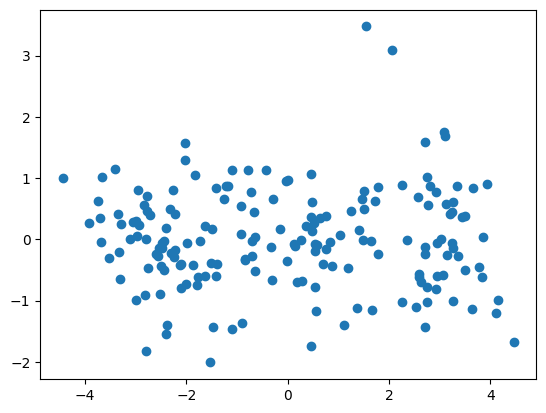

In [29]:
x=pca_values[:,0]
y=pca_values[:,5]
plt.scatter(x,y)

In [30]:
pca=PCA(n_components=3)
reduce_values=pca.fit_transform(data_normalised)
reduce_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01],
       [-3.92258841e+00, -2.76821026e+00, -1.74968168e-01],
       [-1.40751111e+00, -8.67773087e-01,  2.02582949e+00],
       [-3.28812981e+00, -2.13017513e+00, -6.28992339e-01],
       [-2.75057754e+00, -1.17916999e+00, -9.77337471e-01],
       [-2.39286652e+00, -1.61128232e+00,  1.45729462e-01],
       [-2.79525633e+00, -9.23179517e-01, -1.77092548e+00],
       [-3.00559666e+00, -7.96284169e-01, -9.83741629e-01],
       [-3.67868855e+00, -1.31252342e+00, -4.21854170e-01],
       [-2.10963477e+00, -6.12981986e-01, -1.19156995e+00],
       [-2.43845636e+00, -6.78523310e-01, -8.65513701e-01],
       [-3.67349453e+00, -1.14012136e+00, -1.20376870e+00],
       [-4.44157575e+00, -2.11031917e+00, -1.26245041e+00],
       [-2.60892387e+00, -1.66641801e+00,  2.17632760e-01],
       [-2.47542846e+00, -2.33089672e+00

3:Clustering with Original Data

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [63]:
def minmax_norm(i):
  x= (i-i.min())/(i.max()-i.min())
  return (x)

In [64]:
x=minmax_norm(data)
x

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.333333
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.333333
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.333333
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.333333
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,0.666667
174,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,0.666667
175,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,0.666667
176,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,0.666667


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[142.82628559994157, 94.84686681689433, 67.32245436754245, 45.18500000904764, 42.90211960155412, 40.99034550866665, 38.92441781655468, 37.11295372190307, 35.425030308219945, 34.06514806910268, 31.961896273261935, 31.849218454244323, 31.0148486634544, 29.469445636357086, 29.04184835239988, 28.53096854351277]


<function matplotlib.pyplot.show(close=None, block=None)>

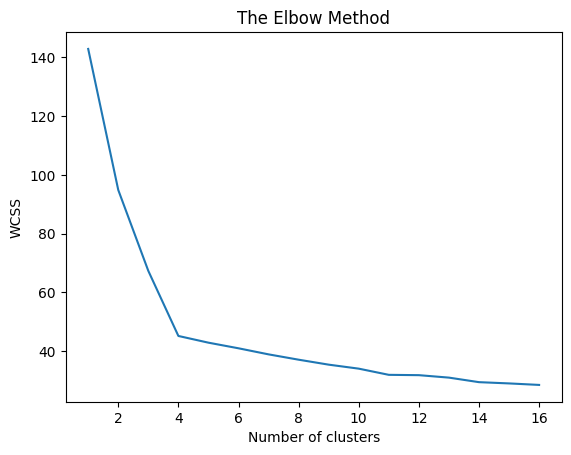

In [65]:
wcss=[]
for i in range(1,17):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,17),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [66]:
cluster_new=KMeans(4,random_state=0)
cluster_new.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [67]:
cluster_new.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [41]:
data['cluster_id']=cluster_new.labels_
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [68]:
cluster_new.cluster_centers_

array([[ 1.00000000e+00,  5.58881579e-01,  5.12598814e-01,
         5.75980392e-01,  5.57560137e-01,  3.18614130e-01,
         2.40948276e-01,  9.31346695e-02,  5.99056604e-01,
         2.34555731e-01,  5.21864333e-01,  1.64803523e-01,
         1.51480464e-01,  2.50995602e-01,  6.66666667e-01],
       [ 5.00000000e-01,  3.41014121e-01,  2.49011858e-01,
         4.63805921e-01,  4.97611265e-01,  3.05408271e-01,
         5.34062237e-01,  4.40722445e-01,  3.07409112e-01,
         4.71493422e-01,  1.58266045e-01,  4.57862384e-01,
         6.45671402e-01,  1.71027452e-01,  1.00000000e+00],
       [-6.66133815e-16,  7.14406780e-01,  2.51122128e-01,
         5.85878727e-01,  3.31818976e-01,  3.94988946e-01,
         6.41437756e-01,  5.57462633e-01,  3.01886792e-01,
         4.69817676e-01,  3.62483369e-01,  4.73198291e-01,
         6.91500590e-01,  5.97512029e-01,  3.33333333e-01],
       [ 5.00000000e-01,  3.11666667e-01,  2.17523057e-01,
         4.85918004e-01,  4.95704467e-01,  2.14130435

In [69]:
Silhouette_score=silhouette_score(x,cluster_new.labels_)
Silhouette_score

0.4528943229001925

4: Clustering with PCA Data:

In [71]:
def minmax_norm(i):
  x= (i-i.min())/(i.max()-i.min())
  return (x)

In [72]:
x=minmax_norm(reduce_values)
x

array([[0.1069951 , 0.31538852, 0.44509635],
       [0.2070798 , 0.49491487, 0.25763698],
       [0.18128822, 0.35728824, 0.56068165],
       [0.06675742, 0.18298155, 0.44407215],
       [0.3199783 , 0.37431975, 0.665651  ],
       [0.13063544, 0.24721966, 0.39836047],
       [0.18475683, 0.34296795, 0.36328868],
       [0.22077159, 0.29946238, 0.47636036],
       [0.18025852, 0.36874137, 0.28338933],
       [0.15908121, 0.38151734, 0.36264391],
       [0.09131354, 0.32954178, 0.41921538],
       [0.24928769, 0.39997241, 0.34171951],
       [0.21618155, 0.39337364, 0.37454723],
       [0.09183648, 0.34689941, 0.34049133],
       [0.01450518, 0.24921878, 0.33458318],
       [0.19901868, 0.29391126, 0.48359966],
       [0.21245915, 0.22701078, 0.5454148 ],
       [0.2375485 , 0.29721641, 0.54168516],
       [0.08491216, 0.20712539, 0.41287467],
       [0.22061604, 0.35451009, 0.44510478],
       [0.12575854, 0.38154466, 0.42505508],
       [0.31253868, 0.43751606, 0.55594896],
       [0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[1687.2795345522206, 925.0339289186143, 491.23057091626697, 407.34095937114876, 355.90298402284645, 312.84713700399425, 280.01129226274094, 250.3751919968148, 227.9422480027147, 212.33316569269346, 194.6976274359189, 174.4972532921227, 168.66414247669138, 157.789699236601, 142.4444047550948, 132.45714677891044]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

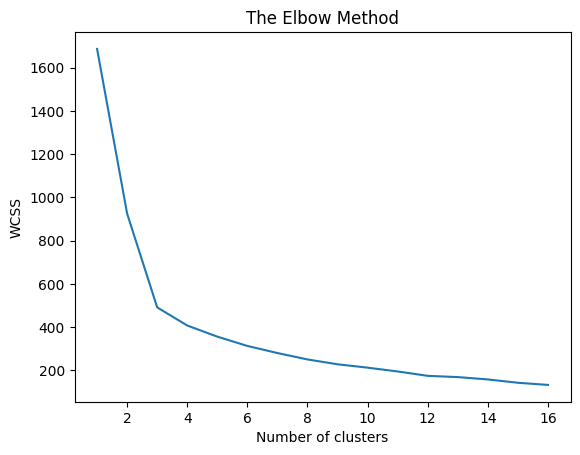

In [74]:
wcss=[]
for i in range(1,17):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(reduce_values)
  wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,17),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show


In [75]:
cluster_new=KMeans(4,random_state=0)
cluster_new.fit(reduce_values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [76]:
cluster_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 0, 2, 3, 2, 2,
       2, 2, 3, 2, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [82]:
print("Silhouette Score (PCA):", silhouette_score(reduce_values, cluster_new.labels_))


Silhouette Score (PCA): 0.4373730550531827


Comparison and Analysis:

Higher silhoutte score indicate better clustering. Original data score is 0.452where as silhouette score for PCA data is 0.437 which indicates better clustering.

Conclusion and Insights

Key findings and insights: I explored the wine dataset using EDA, examining feature distributions and correlations. PCA has been implemented to reduce the dimensionality of the data. k means clustering was applied to both the original and pca transformed data tp group wine samples based on their characteristics The clustering performance is evaluated using silhouette score and davies-bouldin score.

Practical implications of PCA and clustering: PCA: simplifies data analysis by reducing complexity useful for visualisation when dealing with many features.

clustering: groups data points into meaningful categories based on similarities

reccomendations for using pca and clustering use pca when dealing with high dimensional data that might be computationally expensive for clustering algo
Colab paid products - Cancel contracts here
